## ENSEMBLE RANDOM FOREST

In [66]:
from warnings import filterwarnings
filterwarnings('ignore')

### READING A DATASETS

In [67]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [69]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [70]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: title={'center': 'Drug Usage acording to drug types'}, ylabel='Drug'>

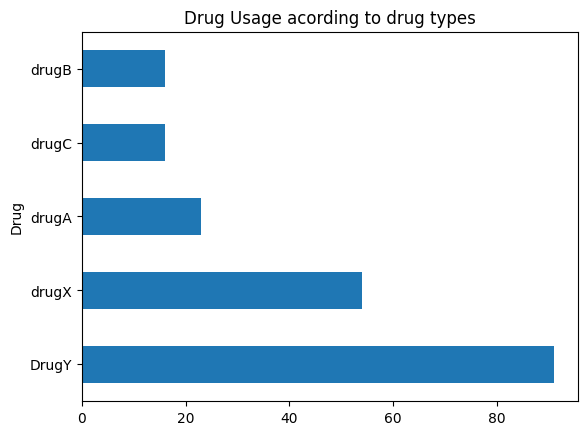

In [71]:
df['Drug'].value_counts().plot(kind='barh',title='Drug Usage acording to drug types')

### CHECKING MISSING VALUES

In [72]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### SEPERATING X AND Y FEATURES

In [73]:
X = df.drop(labels=['Drug'],axis=1)
Y = df[['Drug']]

In [74]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [75]:
Y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


### APPLY LABEL ENCODING TO THE Y VALUES

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
Y['Drug']= le.fit_transform(Y['Drug'])

In [78]:
Y

,Drug
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


In [79]:
Y.value_counts()

Drug
0       91
4       54
1       23
2       16
3       16
Name: count, dtype: int64

### PREPROCESSING ON X FEATURE

In [80]:
cat= list(X.columns[X.dtypes=='object'])
con= list(X.columns[X.dtypes!='object'])

In [81]:
cat

['Sex', 'BP', 'Cholesterol']

In [82]:
con

['Age', 'Na_to_K']

### PIPELINE

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [84]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
pre = ColumnTransformer([('con',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [85]:
X_pre= pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [86]:
cols = pre.get_feature_names_out()

In [87]:
X_pre= pd.DataFrame(X_pre,columns=cols)
X_pre

,con__Age,con__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,0.708057,-0.626917,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,0.465676,-0.859089,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,-1.291591,-0.286500,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### TRAIN TEST SPLIT

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
xtrain,xtest,ytrain,ytest= train_test_split(X_pre,Y,test_size=0.3,random_state=67)

In [90]:
xtrain.shape

(140, 9)

In [91]:
xtest.shape

(60, 9)

In [92]:
ytrain.value_counts()

Drug
0       62
4       36
1       21
2       11
3       10
Name: count, dtype: int64

In [93]:
ytest.value_counts()

Drug
0       29
4       18
3        6
2        5
1        2
Name: count, dtype: int64

### BUILD THE MODEL

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=21)
model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=21)

In [95]:
# Training Accuracy
model.score(xtrain,ytrain)

1.0

In [96]:
# Testing Accuracy
model.score(xtest,ytest)

0.9833333333333333

### HYPERPARAMETER TUNING

In [97]:
params = {'n_estimators':[10,50,100,200],
           'max_depth': [2,3,4,5,6,7],
           'min_samples_split':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
rfc=RandomForestClassifier()

In [100]:
gscv = GridSearchCV(rfc,param_grid=params,cv= 5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [101]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 4,
 'n_estimators': 50}

In [102]:
gscv.best_score_

0.9957333333333335

In [103]:
best_rfc= gscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=50)

### EVALUATING THE MODEL

In [104]:
best_rfc.score(xtrain,ytrain)

1.0

In [105]:
best_rfc.score(xtest,ytest)

0.9833333333333333

### PREDICTING VALUE

In [106]:
ypred_tr= best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [107]:
ypred_tr[0:5]

array([0, 4, 1, 4, 3])

In [108]:
ytrain.head()

,Drug
122,0
72,4
76,1
112,4
196,3


In [109]:
ypred_ts[0:5]

array([4, 0, 0, 0, 1])

In [110]:
ytest.head()

,Drug
32,4
77,0
71,0
166,0
187,1


### GETTING ORIGINAL LABELS

In [111]:
ypred_tr_lb= le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [112]:
ypred_tr_lb[0:5]

array(['DrugY', 'drugX', 'drugA', 'drugX', 'drugC'], dtype=object)

In [113]:
ypred_ts_lb[0:5]

array(['drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA'], dtype=object)

### CHECKING CONFUSION MATRIX

In [114]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

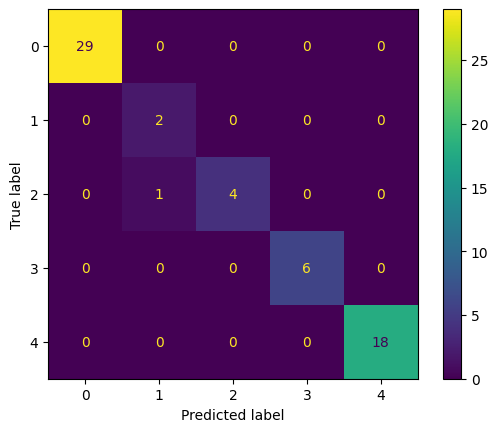

In [115]:
cf= confusion_matrix(ytest,ypred_ts)
cfd= ConfusionMatrixDisplay(cf,display_labels=best_rfc.classes_)
cfd.plot()

### CHECKING CLASSIFICATION REPORT

In [116]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.67      1.00      0.80         2
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.99      0.98      0.98        60



### PREDICTING DATA FOR NEW PATIENTS

In [142]:
def predict_data(pre,model,le,file_path):
    # reading dataset
    xnew= pd.read_csv(file_path)
    # preprocessing
    xnew_pre=pre.transform(xnew)

    # predicting
    pred=model.predict(xnew_pre)

    # getting actual labels
    pred_lb= le.inverse_transform(pred)

    # storing values in dataset
    xnew['Drug_pred']=pred_lb
    xnew.to_csv('predictions.csv',index=False)
    return xnew


In [143]:
Xsample= df.sample(15)
Xsample

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
185,57,F,NORMAL,NORMAL,25.893,DrugY
3,28,F,NORMAL,HIGH,7.798,drugX
41,58,F,HIGH,NORMAL,14.239,drugB
107,42,M,LOW,HIGH,20.013,DrugY
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
121,15,M,HIGH,NORMAL,17.206,DrugY
40,73,F,NORMAL,HIGH,19.221,DrugY
167,57,F,NORMAL,HIGH,14.216,drugX
133,24,M,NORMAL,HIGH,25.786,DrugY


In [144]:
Xsample.to_csv('Patients2.csv',index=False)

In [145]:
file_path='Patients2.csv'

In [146]:
predict_data(pre,best_rfc,le,file_path)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_pred
0,57,F,NORMAL,NORMAL,25.893,DrugY,DrugY
1,28,F,NORMAL,HIGH,7.798,drugX,drugX
2,58,F,HIGH,NORMAL,14.239,drugB,drugB
3,42,M,LOW,HIGH,20.013,DrugY,DrugY
4,49,F,NORMAL,HIGH,16.275,DrugY,DrugY
5,41,M,LOW,HIGH,11.037,drugC,drugC
6,15,M,HIGH,NORMAL,17.206,DrugY,DrugY
7,73,F,NORMAL,HIGH,19.221,DrugY,DrugY
8,57,F,NORMAL,HIGH,14.216,drugX,drugX
9,24,M,NORMAL,HIGH,25.786,DrugY,DrugY
